# Small sample hypothesis testing for a proportion (special topic)

**Assignment:** Section 6.5 of the OpenIntro Statistics textbook (3rd Edition) describes how simulation can assist when the success-failure condition is not met and the sample size is too small to apply the normal model. The step-by-step explanation of how to develop inferential analysis for a single proportion in this case is presented in the chapter.

**Problem:** People providing an organ for donation sometimes seek the help of a special\medical consultant". These consultants assist the patient in all aspects of the surgery, with the goal of reducing the possibility of complications during the medical procedure and recovery. Patients might choose a consultant based in part on the historical complication rate of the consultant's clients. One consultant tried to attract patients by noting the average complication rate for liver donor surgeries in the US is about 10%, but her clients have only had 3 complications in the 62 liver donor surgeries she has facilitated. She claims this is strong evidence that her work meaningfully contributes to reducing complications (and
therefore she should be hired!).

In [1]:
#Imports
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## When the success-failure condition is not met

H0: There is no association between the consultant's contributions and the clients' complication rate. In statistical language, p = 0.10. 

HA: Patients who work with the consultant tend to have a complication rate lower than 10%, i.e. p < 0.10.

The sample proportion: $p'$ = 3/62 = 0.048

## Generating the null distribution and p-value: By simulation

Each client can be simulated using a deck of cards. Take one red card, nine black cards, and mix them up. Then drawing a card is one way of simulating the chance a patient has a complication if the true complication rate is 10% for the data. If we do this 62 times and compute the proportion of patients with complications in the simulation, p', then this sample proportion is exactly a sample from the null distribution.

One simulation isn't enough to get a sense of the null distribution; many simulation studies are needed. Roughly 10,000 seems sufficient. However, paying someone to simulate 10,000 studies by hand is a waste of time and money. Instead, simulations are typically programmed into a computer, which is much more efficient.

There are 493 simulated sample with psim <= 0:048 from 10000.


Text(0, 0.5, 'Number of simulations')

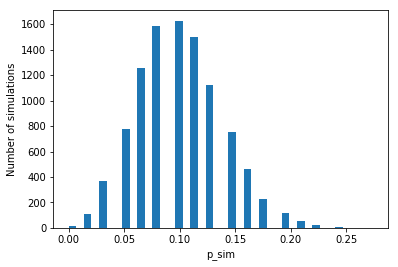

In [2]:
random.seed(27)
p_sim=[]
for ii in range(10000):

    cards = ['Red','Black']
    p_card= [0.1, 0.9]

    card_drawn=[]
    k=0
    N=62

    for i in range(N):
        rand_card = np.random.choice(cards, p=p_card)
        card_drawn.append(rand_card)
        if rand_card =='Red':
            k=k+1

#     print(f"The count of complication cases is {k}")
#     print(f"The count of success cases {N-k}")
#     print(f"The proportion of patients with complications in the simulation is {k/N}")
    p_sim.append(k/N)
count = 0
for i in p_sim: 
    if i <= 0.048 : 
        count = count + 1

print(f"There are {count} simulated sample with psim <= 0:048 from 10000.")
plt.hist(p_sim, bins=40)
plt.xlabel('p_sim')
plt.ylabel('Number of simulations')

## Generating the exact null distribution and p-value : Binomial Model

The number of successes in n independent cases can be described using the binomial model. Exactly k = 3 complications were observed in the n = 62 cases cited by the consultant. Since we are testing against the 10% national average, our null hypothesis is p = 0.10. We can compute the p-value by adding up the cases where there are 3 or fewer complications.

In [3]:
from scipy import stats
p_sim= stats.binom_test(3, n=62, p=0.10, alternative='less')
print(f"The p-value using binomial model is: {p_sim}")

The p-value using binomial model is: 0.1209787267464617


## Using simulation for goodness of fit tests (Chi-square test statistic $X^2$)

Simulation methods may also be used to test goodness of fit. In short, we simulate a new sample based on the purported bin probabilities, then compute a chi-square test statistic. We do this many times (e.g. 10,000 times), and then examine the distribution of these simulated chi-square test statistics. This distribution will be a very precise null distribution for the test statistic if the probabilities are accurate.



|Days      |1     |2    | 3   |4    |5  |6  |7  |Total |
|----------|------|-----|-----|-----|---|---|---|------|
|Observed  | 1532 |760  |338  |194  |74 |33 |17 |2948  |
|Geometric | 1569 |734  |343  |161  |75 |35 |31 |2948  |

In [4]:
# from scipy.stats import chi2_contingency
from scipy.stats import chisquare
Freq= [1,2,3,4,5,6,7]
obs= [[1532, 760, 338, 194, 74, 33, 17],[1569, 734, 343, 161, 75, 35,  31]]
observed= [1532, 760, 338, 194, 74, 33, 17]
expected= [1569, 734, 343, 161, 75, 35,  31]
# chi2_contingency(obs)
chi2, p_value = chisquare(observed, expected)
print(f"The chi2 value is: {chi2}")
print(f"The p-value is: {p_value}")

The chi2 value is: 15.080572345926363
The p-value is: 0.019639215904503887


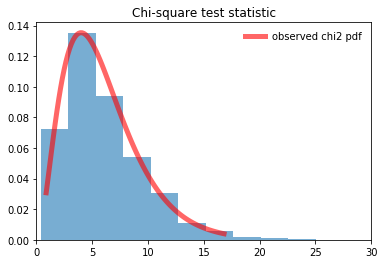

In [5]:
from scipy.stats import chi2

df= 6
fig, ax = plt.subplots(1, 1)
rv = chi2(df)
x = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99, df), 100)
ax.plot(x, chi2.pdf(x, df), 'r-', lw=5, alpha=0.6, label='observed chi2 pdf')
r = chi2.rvs(df, size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.6)
ax.legend(loc='best', frameon=False)
plt.title('Chi-square test statistic')
plt.xlim(0,30)
plt.show()